In [146]:
import numpy as np
import os 
import geopandas
import geopandas.tools
import matplotlib.pyplot as plt
import pandas as pd 
import requests
import json
import io
from shapely.geometry import Point


In [8]:
!ls -l

total 3640
-rw-r--r--  1 seastar  staff   195287 Nov 30 19:05 HW9_as9788_assignment2-Copy1.ipynb
-rw-r--r--  1 seastar  staff   195287 Nov 30 18:56 HW9_as9788_assignment2.ipynb
-rw-r--r--  1 seastar  staff    15978 Nov 28 18:54 Untitled5.ipynb
-rwxr-xr-x@ 1 seastar  staff    17784 Nov 28 18:42 geo_export_893b1e61-1d08-411f-9ce4-db20c76bb4f2.dbf
-rwxr-xr-x@ 1 seastar  staff      212 Nov 28 18:42 geo_export_893b1e61-1d08-411f-9ce4-db20c76bb4f2.prj
-rwxr-xr-x@ 1 seastar  staff  1425020 Nov 28 18:42 geo_export_893b1e61-1d08-411f-9ce4-db20c76bb4f2.shp
-rwxr-xr-x@ 1 seastar  staff      540 Nov 28 18:42 geo_export_893b1e61-1d08-411f-9ce4-db20c76bb4f2.shx


In [9]:
 pumashp = geopandas.GeoDataFrame.from_file('geo_export_893b1e61-1d08-411f-9ce4-db20c76bb4f2.shp')

In [10]:
pumashp.head()

,puma,shape_leng,shape_area,geometry
0,3701,53227.144376,9.792852e+07,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,106050.008344,1.889860e+08,POLYGON ((-73.86477258283533 40.90201244187379...
2,3703,304875.033427,2.670770e+08,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,47970.900868,1.062129e+08,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,3705,68593.066759,1.224946e+08,POLYGON ((-73.87045508990893 40.86663286876232...


In [11]:
pumashp.crs

{'init': 'epsg:4326'}

In [87]:
# using the built in plot function as pumashp.plot(pumashp....)
# using a choroplethNYC function that FBB wrote
import choroplethNYC as cp
cp.choroplethNYC(pumashp, column=None, color="white", edgecolor="black", lw=2);

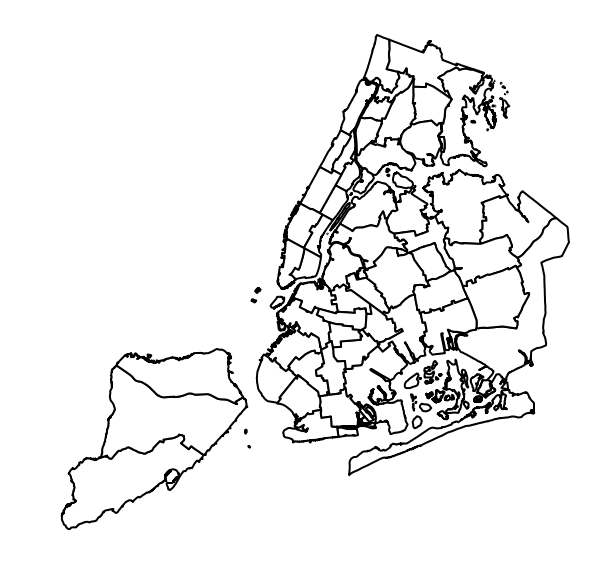

In [88]:
#pumashp.plot()
plt.show()
#plt.text ('this is a plot of NYC shapefile')

#fig.text(.5, .05, txt, ha='center')

In [14]:
#read in in the variables available. the info you need is in the 1year ACS data
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [15]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))
#Python2
#affkeys = np.array(aff1y['variables'].keys())

In [16]:
#extracting variables of B28002 that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_008M',
  'Margin of Error!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_007M',
  'Margin of Error!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_007EA',
  'Annotation of Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_007MA',
  'Annotation of Margin of Error!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_004MA',
  'Annotation of Margin of Error!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_008MA',
  'Annotation of Margin of Error!!Total!!With an Internet s

In [17]:
#keyword for the number of households
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{'attributes': 'B28002_001M,B28002_001EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int',
 'validValues': []}

In [18]:
#('B28002_004E',
 # 'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),

#keyword for the number of households with broarband access
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int',
 'validValues': []}

In [19]:
# getting the broadband access number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" 
#",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB.head()

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [20]:
pumaBB.iloc[0]

B28002_004E                                               32607
NAME                         St. Lawrence County PUMA, New York
state                                                        36
public use microdata area                                   100
Unnamed: 4                                                  NaN
Name: 0, dtype: object

In [21]:
#keyword for the number of households
#keyNhouseholds = 'B28002_001E'
#aff1y['variables'][keyNhouseholds]

# getting the broadband access number of households
#url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
#",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" 
#",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
#resp = requests.request('GET', url).content
#pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

#pumaBB.head()

In [22]:
#getting the first row of the table: the total number of households
url =   "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key="
resp = requests.request('GET', url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
pumaPP.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [23]:
pumaPP_d = pumaPP.drop('Unnamed: 4', axis=1)


In [24]:
pumaBB_d = pumaBB.drop('Unnamed: 4', axis=1)

In [25]:
pumaBB_d.head()

,B28002_004E,NAME,state,public use microdata area
0,32607,"St. Lawrence County PUMA, New York",36,100
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200
2,41210,"Warren & Washington Counties PUMA, New York",36,300
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402


In [26]:
#2.2 generate a feature for the percentage of households with broadband access

#pd.concat([pumaBB, pumaPP], axis=1)

puma_m = pd.merge(pumaBB_d, pumaPP_d, on=['public use microdata area','NAME','state'],how='inner')

In [27]:
puma_m.head()

,B28002_004E,NAME,state,public use microdata area,B28002_001E
0,32607,"St. Lawrence County PUMA, New York",36,100,40479
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,67092
2,41210,"Warren & Washington Counties PUMA, New York",36,300,51614
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,44300
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,61146


In [28]:
# colummn B28002_004E divided by B28002_004E
#df['C'] = df['A'] + df['B']
#puma_m['pcBB'] = puma_m['B28002_004E'].astype(float)  /  puma_m['B28002_001E'].astype(float)
puma_m['pcBB'] = (puma_m['B28002_004E']  /  puma_m['B28002_001E'])*100
#float(df['A'])

In [29]:
puma_m.head()

,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB
0,32607,"St. Lawrence County PUMA, New York",36,100,40479,80.552879
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,67092,75.733321
2,41210,"Warren & Washington Counties PUMA, New York",36,300,51614,79.842678
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,44300,81.433409
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,61146,78.150656


In [30]:
#ACS_16_1YR_GCT2801.ST50_with_ann.csv
#!ls -l $PUIDATA/ACS_16_1YR_GCT2801.ST50_with_ann.csv

In [31]:
acs_file = !echo $PUIDATA/ACS_16_1YR_GCT2801.ST50_with_ann.csv
#print(acs_file)


In [32]:
#acs_data = pd.read_csv(acs_file, encoding = "ISO-8859-1")
#acs_data = pd.read_csv('filename, encoding = "ISO-8859-1")
#ead_csv('file', encoding = "ISO-8859-1"), or alternatively encoding = utf8 for reading, and generally utf-8 for to_csv.

#You can also use the alias 'latin1' instead of 'ISO-8859-1'.



In [33]:
#acs_data.head()

In [34]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50_with_ann.csv",
                   usecols=["Target Geo Id2","Percent", "Margin of Error"], header=1)
            #usecols=["GCT_STUB.target-geo-id2","HC01","HC02"])
            
bbpc.head()

,Target Geo Id2,Percent,Margin of Error
0,1,74.7,0.5
1,100100,70.9,2.5
2,100200,80.5,2.7
3,100301,87.0,2.8
4,100302,81.9,2.9


In [35]:
#make the rows the titles 
bbpc["gid"] = bbpc["Target Geo Id2" ]- 3600000 
# make new geo id 
bbpc.head()

,Target Geo Id2,Percent,Margin of Error,gid
0,1,74.7,0.5,-3599999
1,100100,70.9,2.5,-3499900
2,100200,80.5,2.7,-3499800
3,100301,87.0,2.8,-3499699
4,100302,81.9,2.9,-3499698


In [36]:
diff_ = puma_m.merge(bbpc, right_on="gid", 
                     left_on="public use microdata area")[["pcBB", "Percent"]]

diff_["diff"] = np.abs(diff_["pcBB"] - diff_["Percent"].astype(float))

diff_.describe()

,pcBB,Percent,diff
count,145.000000,145.000000,145.000000
mean,81.845478,81.843448,0.026217
std,7.063369,7.065358,0.014480
min,54.932945,54.900000,0.000178
25%,77.770257,77.800000,0.012252
50%,82.826141,82.800000,0.027230
75%,87.305077,87.300000,0.039090
max,93.404143,93.400000,0.049872


In [37]:
#choropleth of the percentage of internet axcess



#puma_m = pd.merge(pumaBB_d, pumaPP_d, on=['public use microdata area','NAME','state'],how='inner')


#pumashp_b = pumashp.merge(puma_m, pumashp, on=['public use microdata area'], how = 'inner')

#cp.choroplethNYC(...);

In [38]:
#3.1 Merge with the puma geodataframe and plot a choropleth of the percentage of households with broadband access

#pd.merge(df_new, df_n, left_on='subject_id', right_on='subject_id')


In [39]:
puma_m.head()
#d1_puma = puma_m.var(columns=[ 'public use microdata area' ], dtype=float)


,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB
0,32607,"St. Lawrence County PUMA, New York",36,100,40479,80.552879
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,67092,75.733321
2,41210,"Warren & Washington Counties PUMA, New York",36,300,51614,79.842678
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,44300,81.433409
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,61146,78.150656


In [40]:
puma_m[['public use microdata area']] = puma_m[['public use microdata area']].astype('int')

In [41]:
puma_m.head()

,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB
0,32607,"St. Lawrence County PUMA, New York",36,100,40479,80.552879
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,67092,75.733321
2,41210,"Warren & Washington Counties PUMA, New York",36,300,51614,79.842678
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,44300,81.433409
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,61146,78.150656


In [42]:
pumashp.head()

,puma,shape_leng,shape_area,geometry
0,3701,53227.144376,9.792852e+07,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,106050.008344,1.889860e+08,POLYGON ((-73.86477258283533 40.90201244187379...
2,3703,304875.033427,2.670770e+08,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,47970.900868,1.062129e+08,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,3705,68593.066759,1.224946e+08,POLYGON ((-73.87045508990893 40.86663286876232...


In [43]:
pumashp[['puma']] = pumashp[['puma']].astype('int')

In [106]:
#pumashp_b.head()

In [46]:
pumashp['puma'].dtype

dtype('int64')

In [47]:
puma_m['public use microdata area'].dtype

dtype('int64')

In [99]:

pumashp_b = pumashp.merge(puma_m, right_on='public use microdata area', left_on= 'puma') 

In [100]:
pumashp_b.head()

,puma,shape_leng,shape_area,geometry,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB
0,3701,53227.144376,9.792852e+07,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,42158,84.275820
1,3702,106050.008344,1.889860e+08,POLYGON ((-73.86477258283533 40.90201244187379...,34030,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,49817,68.310015
2,3703,304875.033427,2.670770e+08,(POLYGON ((-73.78833349834532 40.8346671297593...,36716,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,44329,82.826141
3,3704,47970.900868,1.062129e+08,"POLYGON ((-73.84792614069238 40.8713422330779,...",32269,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,44476,72.553737
4,3705,68593.066759,1.224946e+08,POLYGON ((-73.87045508990893 40.86663286876232...,40757,"NYC-Bronx Community District 3 & 6--Belmont, C...",36,3705,58706,69.425612


In [101]:
#cp.choroplethNYC(...);
#cp.choroplethNYC(pumashp_b,   edgecolor="black", lw=2); #color="white", column='pcBB',
#cp.choroplethNYC(pumashp_b)
#f, ax, cb = cp.choroplethNYC(pumashp_b, "pcBB", kind='continuous', cmap="viridis")
#plt.show()

#f, ax = plt.subplots(figsize=(10,10))
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#pumashp_b.plot(column='pcBB',alpha=1,linewidth=0.5,ax=ax, cmap='viridis')
#plt.title("pcBB map colored by boroughs")
#import matplotlib
#matplotlib.style.use('ggplot')
#cp.choroplethNYC(pumashp_b, column='pcBB')
#cp.choroplethNYC(pumashp_b, edgecolor="black", lw=2)

In [102]:
help(pumashp_b)

Help on GeoDataFrame in module geopandas.geodataframe object:

class GeoDataFrame(geopandas.base.GeoPandasBase, pandas.core.frame.DataFrame)
 |  A GeoDataFrame object is a pandas.DataFrame that has a column
 |  with geometry. In addition to the standard DataFrame constructor arguments,
 |  GeoDataFrame also accepts the following keyword arguments:
 |  
 |  Keyword Arguments
 |  -----------------
 |  crs : str (optional)
 |      Coordinate system
 |  geometry : str or array (optional)
 |      If str, column to use as geometry. If array, will be set as 'geometry'
 |      column on GeoDataFrame.
 |  
 |  Method resolution order:
 |      GeoDataFrame
 |      geopandas.base.GeoPandasBase
 |      pandas.core.frame.DataFrame
 |      pandas.core.generic.NDFrame
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.SelectionMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __finalize__(s

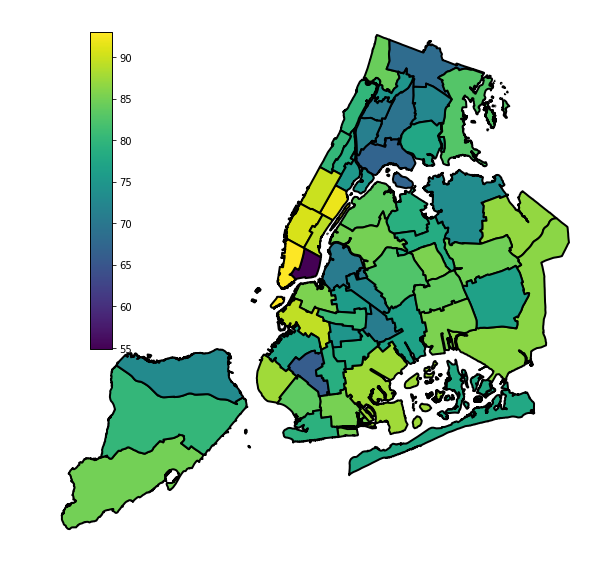

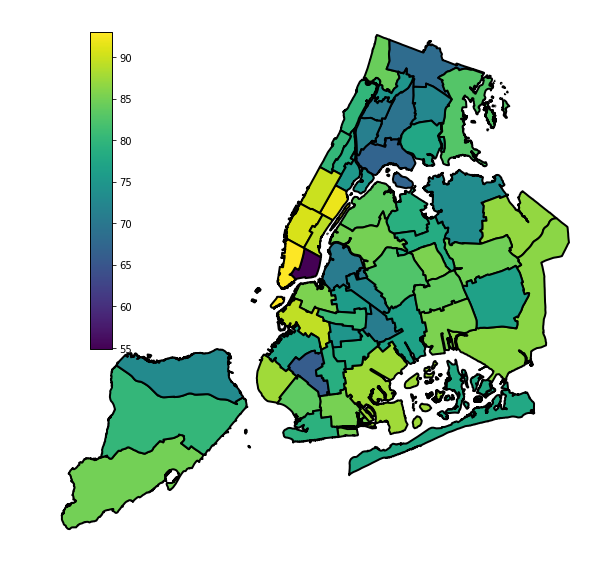

In [108]:
cp.choroplethNYC(pumashp_b, column='pcBB', edgecolor="black", lw=2) 
plt.show()

In [131]:
#4.LinkNYC: assess whether the locations of the linkNYC stations are supplying internet where it is needed.

#https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW9_fb55/linkNYClocations.csv
linkNYC = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW9_fb55/linkNYClocations.csv')

linkNYC.head()

,Unnamed: 0,link_site,longitude,date_link_,latitude
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133


In [132]:
linkNYC.shape
#newcol = (linkNYC['latitude'], linkNYC['longitude'])

#print (newcol)
#linkNYC.assign(lonlat = newcol)
#newcol = np.log(df['A'])
#df.assign(ln_A=newcol)

(1414, 5)

In [139]:
#df['period'] = df['Year'].astype(str) + df['quarter']
linkNYC['lonlat']= ('('+linkNYC['latitude'].astype(str)+','+linkNYC['longitude'].astype(str)+')')
#df['combined']=df['bar'].astype(str)+'_'+df['foo']+'_'+df['new']
#linkNYC['lonlat']=(linkNYC.longitude,linkNYC.latitude)
linkNYC.head()

,Unnamed: 0,link_site,longitude,date_link_,latitude,lonlat
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(40.70166753,-73.94248859)"
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(40.7015421938,-73.9421692831)"
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(40.7019303439,-73.9422392385)"
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(40.70506042,-73.94291758)"
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(40.728133,-73.953439)"


In [ ]:
#plot the location of the linkNYC stations on top of a choropleth of broadband access percentage in 5 equal intervals
#I have also color coded the station by how long ago they have been installed, using the date datetime variable

In [159]:
#places = geopandas.GeoDataFrame(linkNYC, geometry="geometry")


#places = pandas.DataFrame(raw_data, columns=["name", "latitude", "longitude"])


# Create the geometry column from the coordinates
# Remember that longitude is east-west (i.e. X) and latitude is north-south (i.e. Y)
linkNYC["geometry"] = linkNYC.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
#del(places["latitude"], places["longitude"])

# Convert to a GeoDataFrame
linkNYC = geopandas.GeoDataFrame(linkNYC, geometry="geometry")
linkNYC.crs = {"init": "epsg:4326"}
linkNYC.head()

,Unnamed: 0,link_site,longitude,date_link_,latitude,lonlat,geometry
index_right,,,,,,,
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668,"([40.70166753, 40.7015421938, 40.7019303438999...",POINT (-73.94248859 40.70166753)
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542,"([40.70166753, 40.7015421938, 40.7019303438999...",POINT (-73.9421692831 40.7015421938)
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930,"([40.70166753, 40.7015421938, 40.7019303438999...",POINT (-73.94223923850001 40.7019303439)
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060,"([40.70166753, 40.7015421938, 40.7019303438999...",POINT (-73.94291758 40.70506042)
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133,"([40.70166753, 40.7015421938, 40.7019303438999...",POINT (-73.953439 40.728133)


In [177]:

# Perform the spatial join
result = geopandas.tools.sjoin(pumashp_b, linkNYC, how="right")

# Print the results...
result.head()

,index_left,puma,shape_leng,shape_area,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB,Unnamed: 0,link_site,longitude,date_link_,latitude,lonlat,geometry
index_right,,,,,,,,,,,,,,,,,
1286,0,3701,53227.144376,9.792852e+07,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,42158,84.275820,1286,bx-08-145850,-73.902101,2017-06-10,40.868698,"([40.70166753, 40.7015421938, 40.7019303438999...",POINT (-73.90210090000002 40.86869849)
927,4,3705,68593.066759,1.224946e+08,40757,"NYC-Bronx Community District 3 & 6--Belmont, C...",36,3705,58706,69.425612,927,bx-06-118922,-73.898221,2017-10-20,40.846926,"([40.70166753, 40.7015421938, 40.7019303438999...",POINT (-73.898220556 40.84692617469999)
917,5,3706,51799.404764,4.388687e+07,34391,"NYC-Bronx Community District 7--Bedford Park, ...",36,3706,46018,74.733800,917,bx-05-119659,-73.893343,2016-12-06,40.860027,"([40.70166753, 40.7015421938, 40.7019303438999...",POINT (-73.893343 40.860027)
25,5,3706,51799.404764,4.388687e+07,34391,"NYC-Bronx Community District 7--Bedford Park, ...",36,3706,46018,74.733800,25,bx-05-116218,-73.893059,2016-05-12,40.860215,"([40.70166753, 40.7015421938, 40.7019303438999...",POINT (-73.89305944 40.86021467)
1283,5,3706,51799.404764,4.388687e+07,34391,"NYC-Bronx Community District 7--Bedford Park, ...",36,3706,46018,74.733800,1283,bx-05-145959,-73.897400,2017-10-06,40.861150,"([40.70166753, 40.7015421938, 40.7019303438999...",POINT (-73.8974 40.86115)


In [154]:
#combine long lat into a column like you did in the lab to greate a "geometry" 
#column for the dataframe, then convert the dataframe into a GeoDataFrame linkNYC and set 
#native coordinates frame to lat/lon as you did in the lab


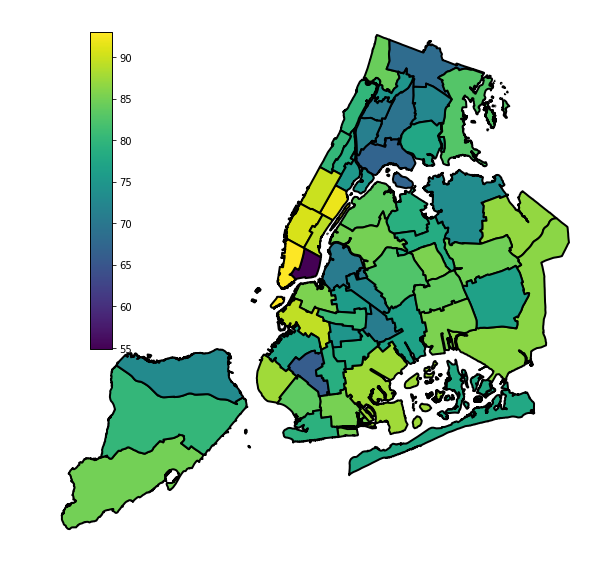

In [170]:
#linkNYC.crs = ...
#fig, ax, cb = choroplethNYC.choroplethNYC(precincts, "shape_area", cb=True)
import choroplethNYC as cp
cp.choroplethNYC(pumashp_b, column='pcBB', edgecolor="black", lw=2) 
plt.show()

In [172]:
import choroplethNYC as cp
cp.choroplethNYC?
#(result, column='pcBB', edgecolor="black", lw=2) 
#plt.show()

In [178]:
result.plot(column = 'geometry', marker='*',  markersize=5);

TypeError: unhashable type: 'Point'